In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def trapezoid_method(a,b,N,f):
    Nint = int(N)
    xvals = np.linspace(a,b,Nint+1)
    fvals = f(xvals)
    dx = (b-a)/N
    return dx/2.*(fvals[0] + fvals[Nint] + 2.*np.sum(fvals[1:Nint])) 

In [3]:
def simpsons_method(a,b,N,f):
    Nint = int(N)
    TNint = 2*N
    xvals = np.linspace(a,b,TNint+1)
    fvals = f(xvals)
    dx = (b-a)/(2.*N)
    return dx/3.*(fvals[0] + fvals[TNint] + 2.*np.sum(fvals[2:TNint-1:2]) + 4.*np.sum(fvals[1:TNint:2])) 

**Problem 1**: (10 pts) A particle of mass $m$ moving through a fluid is subjected to viscous resistance $R(v)$, where $v$ is the particle's velocity.  Suppose that relationship between the resistance $R$, velocity $v$, and the time of travel is given by 
$$
t = \int_{v_{0}}^{v(t)} \frac{m}{R(u)} du, 
$$
where $v_{0} = v(0)$ is the intial velocity of the particle.  Now suppose that 
$$
R(v) = -R_{\infty}\left(\frac{2}{1 + e^{-v^2/v_{c}^{2}}}-1\right).
$$
For a particle of mass $m=1 ~kg$ (kilograms), with $v_{0}=10 ~m/s$ (meters/second), and $v_{c} = 2 ~m/s$ and $R_{\infty} = 3 ~kg ~m/s^{2}$, using the Trapezoid Method, find the approximate time necessary for the particle to slow to $v(t) = 5 ~ m/s$.

**Problem 2** (20 pts): In class, we showed that Simpson's method for finding the integral 

$$
T_{[a,b]}(f) = \int_{a}^{b} f(x) dx, 
$$

over a mesh $\left\{ x_{j} \right\}_{j=0}^{2N}$, $x_{j} = a + j\delta x$, $\delta x = (b-a)/(2N)$, is found via a series of local approximations via the formula 

\begin{align*}
\int_{a}^{b} f(x) dx = & \sum_{l=0}^{N-1} \int_{x_{2l}}^{x_{2l+2}} f(x) dx \\
\approx & \sum_{l=0}^{N-1} \int_{x_{2l}}^{x_{2l+2}} y_{2l+1}(x;x_{2l+1}) dx 
\end{align*}

where the approximating interpolatory polynomial $y_{2l+1}(x;x_{2l+1})$ is given by 

$$
y_{2l+1}(x;x_{2l+1}) = a_{2l+1}\left(x-x_{2l+1} \right)^{2} + b_{2l+1}\left(x-x_{2l+1} \right) + c_{2l+1}.
$$

The coefficients $a_{2l+1}$, $b_{2l+1}$, and $c_{2l+1}$ are found via the _interpolation_ requirements

\begin{align*}
y_{2l+1}(x_{2l};x_{2l+1}) = & f\left(x_{2l}\right) = f_{2l}\\
y_{2l+1}(x_{2l+1};x_{2l+1}) = & f\left(x_{2l+1}\right) = f_{2l+1}\\
y_{2l+1}(x_{2l+2};x_{2l+1}) = & f\left(x_{2l+2}\right) = f_{2l+2}\\
\end{align*}

* **Part a)** (5 pts) Using the above interpolatory requirements, show that 
$$
a_{2l+1} = \frac{1}{2(\delta x)^{2}}\left(f_{2l} -2f_{2l+1} + f_{2l+2} \right), ~ b_{2l+1} = \frac{1}{2\delta x}\left(f_{2l+2}-f_{2l} \right), ~ c_{2l+1} = f_{2l+1}
$$

* **Part b)** (5 pts) Using the Taylor series expansions
\begin{align*}
f_{2l} = f\left(x_{2l+1}-\delta x\right) = f_{2l+1} - f'\left(x_{2l+1}\right)\delta x + \frac{1}{2}f''\left(x_{2l+1}\right)(\delta x)^{2} - \frac{1}{6}f'''\left(x_{2l+1}\right)(\delta x)^{3} + C_{2l+1}(\delta x)^{4}\\
f_{2l+2} = f\left(x_{2l+1}+\delta x\right) = f_{2l+1} + f'\left(x_{2l+1}\right)\delta x + \frac{1}{2}f''\left(x_{2l+1}\right)(\delta x)^{2} + \frac{1}{6}f'''\left(x_{2l+1}\right)(\delta x)^{3} + \bar{C}_{2l+1}(\delta x)^{4}
\end{align*}
show that 
\begin{align*}
y_{2l+1}\left(x;x_{2l+1}\right) = & f_{2l+1} + f'\left(x_{2l+1}\right)\left(x-x_{2l+1}\right) + \frac{f''(x_{2l+1})}{2}\left(x-x_{2l+1}\right)^{2} \\
& + \frac{(\delta x)^{2}}{2}\left(\frac{1}{3}f'''\left(x_{2l+1}\right) + \left(\bar{C}_{2l+1}-C_{2l+1}\right)\delta x\right)\left(x-x_{2l+1}\right) + \frac{1}{2}\left(C_{2l+1}+\bar{C}_{2l+1}\right)\left(\delta x\right)^{2}\left(x-x_{2l+1}\right)^{2}
\end{align*}

* **Part c)** (5 pts) Using the Taylor series expansion
$$
f(x) = f_{2l+1} + f'\left(x_{2l+1}\right)\left(x - x_{2l+1} \right) + \frac{1}{2}f''(x_{2l+1})\left(x - x_{2l+1} \right)^{2} + \frac{1}{6}f'''(x_{2l+1})(x-x_{2l+1})^{3} + \tilde{C}_{2l+1}\left(x-x_{2l+1}\right)^{4}
$$
show that 
\begin{align}
\int_{x_{2l}}^{x_{2l+2}} \left(f(x) - y_{2l+1}(x;x_{2l+1}) \right) dx = & \left(\frac{2}{5}\tilde{C}_{2l+1} - \frac{1}{3}\left(C_{2l+1}+\bar{C}_{2l+1}\right) \right)(\delta x)^{5}\\
= & \hat{C}_{2l+1}\left(\delta x \right)^{5},
\end{align}
where we use the relabeling
$$
\hat{C}_{2l+1} \equiv \frac{2}{5}\tilde{C}_{2l+1} - \frac{1}{3}\left(C_{2l+1}+\bar{C}_{2l+1}\right)
$$

* **Part d)** (5 pts) Letting the global Simpson's approximation be $A_{2N}(f)$ where
\begin{align}
A_{2N}(f) = & \sum_{l=0}^{N-1} \int_{x_{2l}}^{x_{2l+2}} y_{2l+1}(x;x_{2l+1}) dx \\
= &\frac{\delta x}{3}\left(f_{0} + f_{2N} + 2\sum_{l=1}^{N-1}f_{2l} + 4\sum_{l=0}^{N-1}f_{2l+1} \right)
\end{align}
show that 
$$
T_{[a,b]}(f) - A_{2N}(f) = \frac{\hat{C}_{M}}{2}(b-a)(\delta x)^{4}
$$
where $\hat{C}_{M}$ is the biggest of all the constants $\hat{C}_{2l+1}$ (Note, technically we should have inequalities throughout all of this, but we are only telling a small fib...)

**Problem 3** (10 pts): Choose an example and using the code from Lecture 5 as a model, numerically verify the error analysis we performed for Simpson's method above by generating a log/log plot and a corresponding estimate of the slope of the plotted line.  Note, you may have to use clever choices for $N$ or slicing choices in order to remove nan terms and the like from your slope estimates.  Provide a brief summary of your results.  

In [4]:
def test_fun(xvals):
    return np.cos(xvals)**2.

In [12]:
def error_test(a,b,f):
    tval = .5*(b-a + .5*(np.sin(2.*b)-np.sin(2.*a)))
    Nvals = np.array([1e1, 1e2, 1e3, 1e4, 1e5])
    Evals = np.zeros(Nvals.size)
    for jj in range(Nvals.size):
        Evals[jj] = np.abs(tval - simpsons_method(a,b,int(Nvals[jj]),f))
    xvals = np.log10(Nvals)
    plt.plot(xvals,np.ma.log10(Evals))
    plt.xlabel('')
    plt.ylabel('')
    novals = Evals.size
    slopes = np.ma.log10(Evals[1:]) - np.ma.log10(Evals[:-1])
    print(np.min(slopes))
    print(np.max(slopes))
    print(np.mean(slopes))

-4.00031973344144
-3.97864607212229
-3.989482902781865


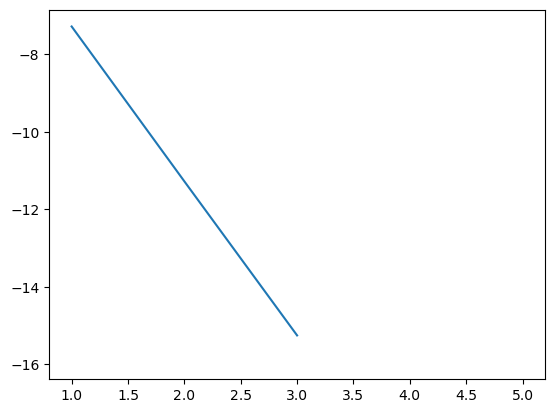

In [13]:
error_test(0,np.pi/4.,test_fun)